#**NETFLIX DEVELOPMENT**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv(r'/content/drive/MyDrive/Netflix data/netflix_titles.csv')
df.sample(10, random_state=10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
659,s660,TV Show,Bangkok Love Stories: Innocence,NaN,"Nida Patcharaveerapong, Nicole Theriault, Natt...",Thailand,"June 19, 2021",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",From a teenage parkour enthusiast to a bawdy r...
6112,s6113,Movie,Alien Contact: Outer Space,J. Michael Long,J. Michael Long,United States,"January 9, 2018",2017,TV-PG,63 min,Documentaries,This fact-based account delves into humankind'...
5950,s5951,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",1991,TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro..."
6242,s6243,Movie,Barbie: The Princess & the Popstar,Ezekiel Norton,"Kelly Sheridan, Jennifer Waris, Ashleigh Ball,...",United States,"October 1, 2017",2012,TV-Y,75 min,Children & Family Movies,Barbie stars as a princess who would rather si...
7160,s7161,Movie,Kaalia,Tinnu Anand,"Amitabh Bachchan, Asha Parekh, Parveen Babi, A...",India,"December 31, 2019",1981,TV-14,173 min,"Action & Adventure, Dramas, International Movies",Jailed for robbing his brother’s unscrupulous ...
202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...
6286,s6287,Movie,"Berlin, I Love You",NaN,NaN,Germany,"June 8, 2019",2019,R,120 min,"Dramas, International Movies, Romantic Movies","Set in the Grey City, this ""Cities of Love"" in..."
5252,s5253,Movie,Gerald's Game,Mike Flanagan,"Carla Gugino, Bruce Greenwood, Henry Thomas, C...",United States,"September 29, 2017",2017,TV-MA,103 min,"Horror Movies, Thrillers","When her husband's sex game goes wrong, Jessie..."
4405,s4406,TV Show,Super Drags,NaN,"Fernando Mendonça, Sérgio Cantú, Wagner Follar...",Brazil,"November 9, 2018",2018,TV-MA,1 Season,"International TV Shows, TV Comedies","In this adult animated series, three gay co-wo..."
3929,s3930,Movie,Liss Pereira: Reteniendo líquidos,Fernando Ayllón,Liss Pereira,Brazil,"April 10, 2019",2019,TV-14,59 min,Stand-Up Comedy,A pregnant Liss Pereira shares hilariously unc...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.drop(columns='show_id', inplace=True)

In [9]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df['director'].fillna('No Data Found', inplace=True)
df['cast'].fillna('No Data Found', inplace=True)
df['country'].fillna('No Data Found', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('No Data Found', inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [11]:
df.sample(10, random_state=10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
659,TV Show,Bangkok Love Stories: Innocence,No Data Found,"Nida Patcharaveerapong, Nicole Theriault, Natt...",Thailand,"June 19, 2021",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",From a teenage parkour enthusiast to a bawdy r...
6112,Movie,Alien Contact: Outer Space,J. Michael Long,J. Michael Long,United States,"January 9, 2018",2017,TV-PG,63 min,Documentaries,This fact-based account delves into humankind'...
5950,Movie,Triumph of the Heart,Richard Michaels,"Mario Van Peebles, Susan Ruttan, Lane R. Davis...",United States,"October 1, 2011",1991,TV-PG,93 min,"Dramas, Sports Movies","This drama tells the tale of Ricky Bell, a pro..."
6242,Movie,Barbie: The Princess & the Popstar,Ezekiel Norton,"Kelly Sheridan, Jennifer Waris, Ashleigh Ball,...",United States,"October 1, 2017",2012,TV-Y,75 min,Children & Family Movies,Barbie stars as a princess who would rather si...
7160,Movie,Kaalia,Tinnu Anand,"Amitabh Bachchan, Asha Parekh, Parveen Babi, A...",India,"December 31, 2019",1981,TV-14,173 min,"Action & Adventure, Dramas, International Movies",Jailed for robbing his brother’s unscrupulous ...
202,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...
6286,Movie,"Berlin, I Love You",No Data Found,No Data Found,Germany,"June 8, 2019",2019,R,120 min,"Dramas, International Movies, Romantic Movies","Set in the Grey City, this ""Cities of Love"" in..."
5252,Movie,Gerald's Game,Mike Flanagan,"Carla Gugino, Bruce Greenwood, Henry Thomas, C...",United States,"September 29, 2017",2017,TV-MA,103 min,"Horror Movies, Thrillers","When her husband's sex game goes wrong, Jessie..."
4405,TV Show,Super Drags,No Data Found,"Fernando Mendonça, Sérgio Cantú, Wagner Follar...",Brazil,"November 9, 2018",2018,TV-MA,1 Season,"International TV Shows, TV Comedies","In this adult animated series, three gay co-wo..."
3929,Movie,Liss Pereira: Reteniendo líquidos,Fernando Ayllón,Liss Pereira,Brazil,"April 10, 2019",2019,TV-14,59 min,Stand-Up Comedy,A pregnant Liss Pereira shares hilariously unc...


# Distribution bw Movie and TV Show
Netflix has about approximately 69.62% of Movie type and 30.38% TV show

([<matplotlib.patches.Wedge at 0x7f1e9092e830>,
 [Text(-0.7629063144163866, 1.0772065518848304, 'Movie'),
  Text(0.7629063144163865, -1.0772065518848304, 'TV Show')],
 [Text(-0.41613071695439263, 0.5875672101189983, '69.615%'),
  Text(0.4161307169543926, -0.5875672101189984, '30.385%')])

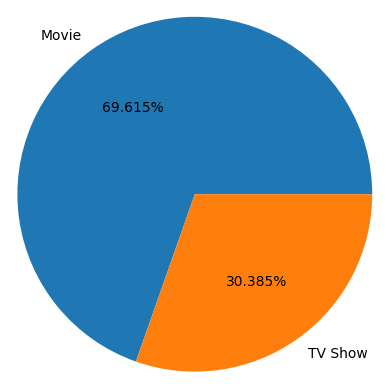

In [12]:
netflix_type = df['type'].value_counts()
plt.pie(netflix_type, labels=netflix_type.index, autopct='%1.3f%%',radius = 1.2)

Từ năm 2008 đến năm 2021, Netflix đã mở rộng đáng kể khả năng phân phối của mình bằng cách cung cấp nhiều loại chương trình truyền hình và phim. Với thư viện gồm 2.676 chương trình truyền hình và 6.131 bộ phim, Netflix đã trở thành công ty thống trị trong ngành phát trực tuyến.

# Duration

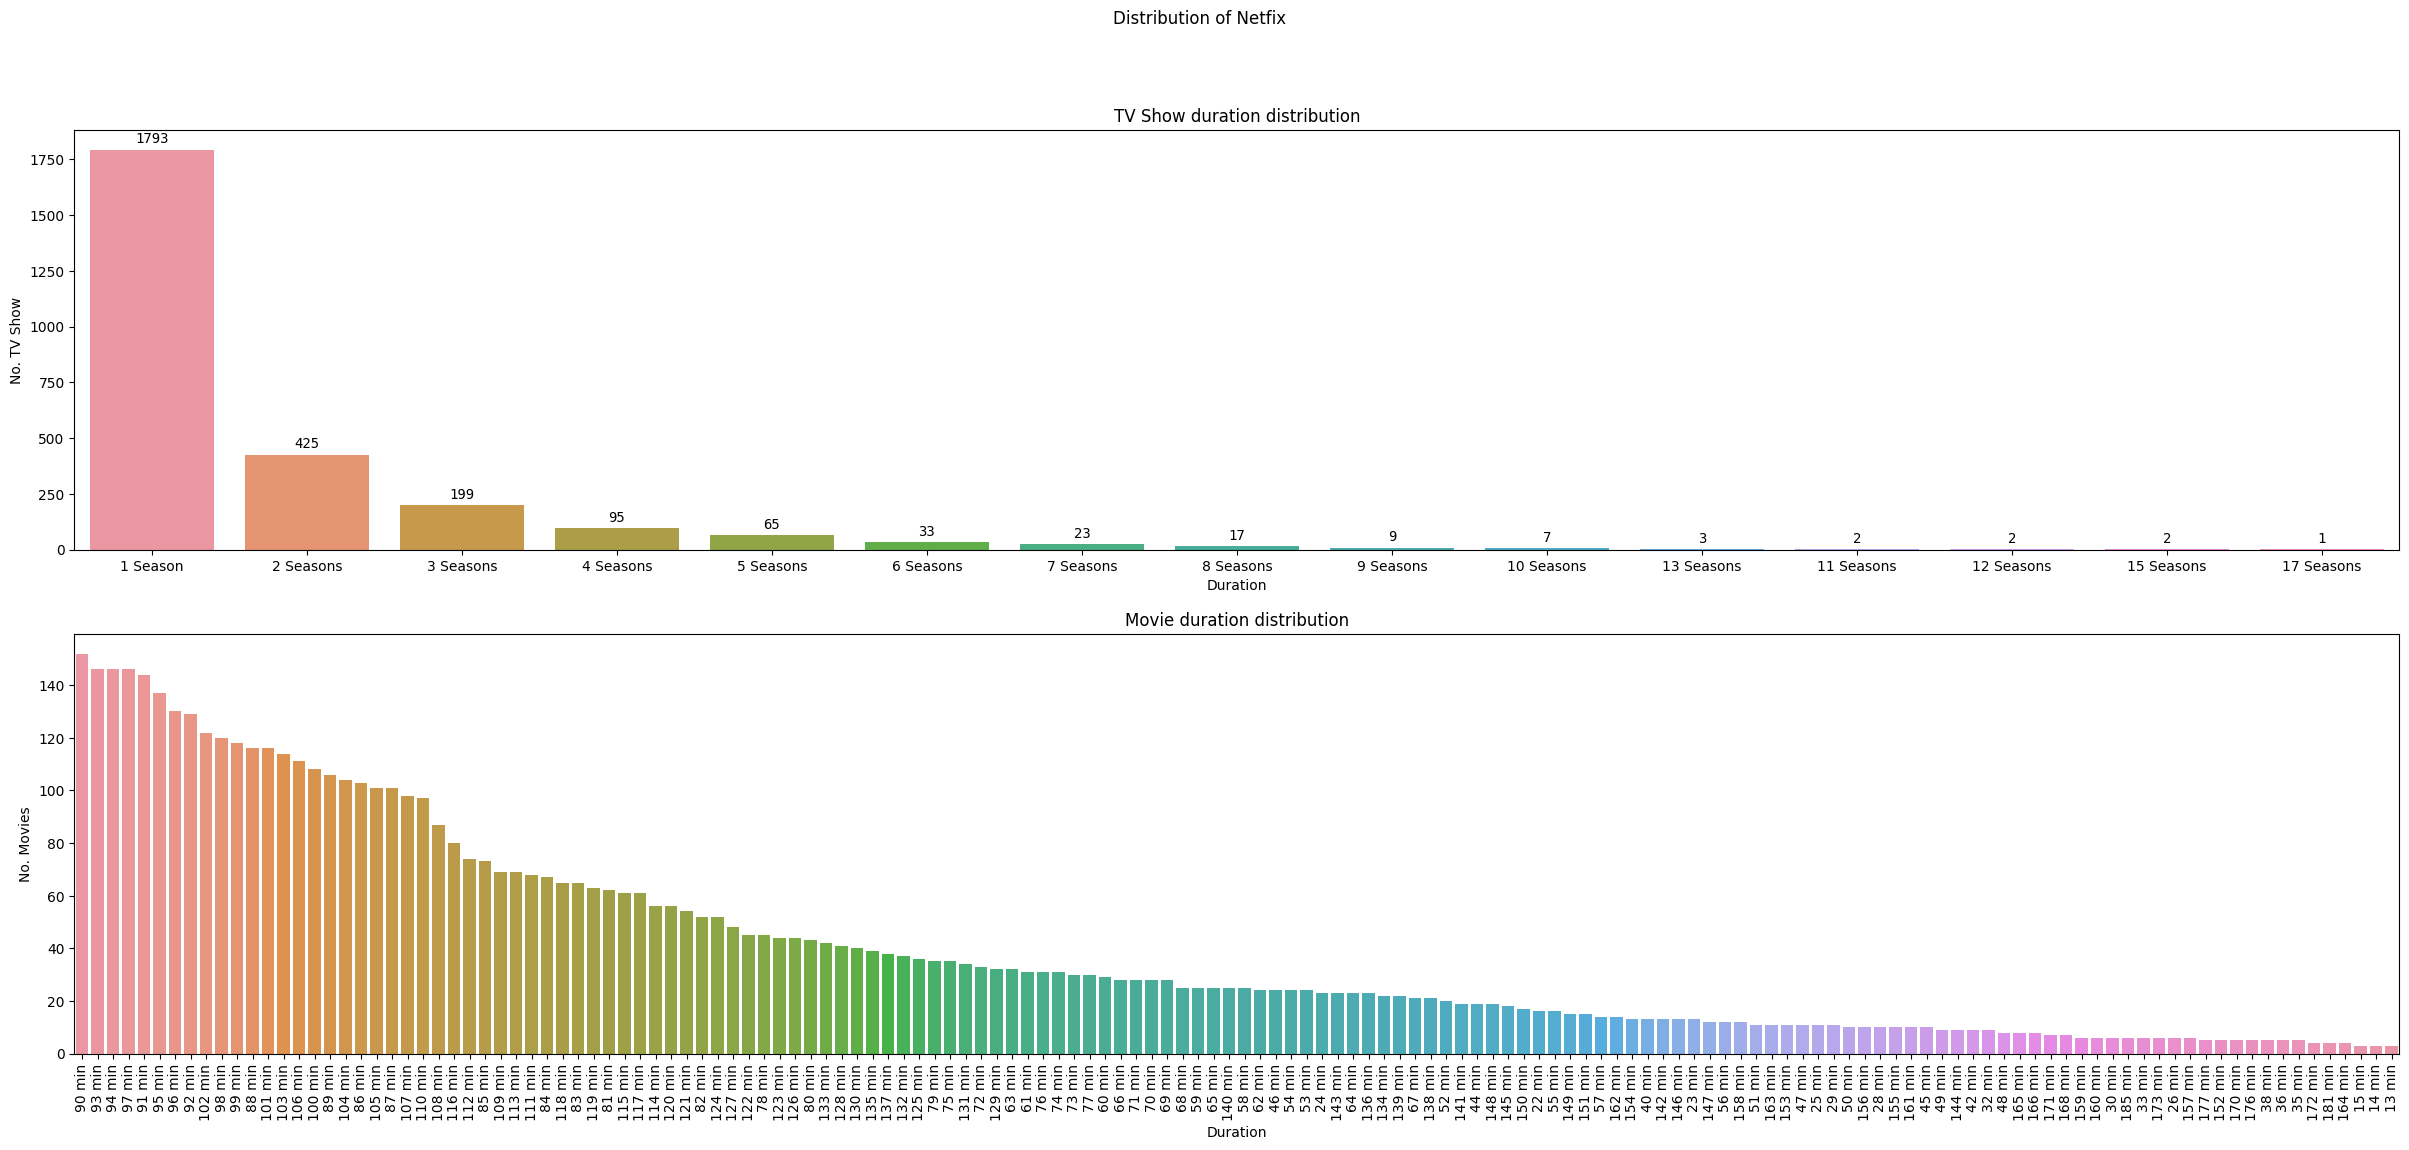

In [13]:
TV_show = df[(df['type'] == 'TV Show')].groupby('duration').size().sort_values(ascending=False).reset_index()
TV_show.rename(columns={0:'value_counts'}, inplace=True)

movie = df[df['type'] == 'Movie'].groupby('duration').size().sort_values(ascending=False).reset_index()
movie.rename(columns={0: 'sum'}, inplace=True)

plt.figure(figsize=(30,12))
plt.suptitle('Distribution of Netfix')

plt.subplot(211)
sns.barplot(TV_show, x='duration', y='value_counts')
plt.ylabel('No. TV Show')
plt.xlabel('Duration')
for i in range(TV_show.shape[0]):
    plt.text(
        x=i,
        y=TV_show.iloc[i, 1] + 30,
        s=TV_show.iloc[i, 1],
        ha='center',
        fontsize='medium',
        fontname='monospace'
    )
plt.title('TV Show duration distribution')

plt.subplot(212)
sns.barplot(movie[:150], x='duration', y='sum')
plt.ylabel('No. Movies')
plt.xlabel('Duration')
plt.xticks(rotation='vertical')
plt.title('Movie duration distribution')

plt.show()

TV Show với 1 season được cho ra mắt với khối lượng lớn xuyên suốt các năm qua với con số lên đến 1793 cao hơn gấp 4 lần so với những chương trình có 2 mùa (xếp thứ 2). So với tổng số lượng phim dài tập thì ta có thể thấy được những bộ phim có 1 và 2 seasons chiếm đến 84% (trong đó bộ 1 mùa chiếm 67%), điều này giúp ta có thể thấy được cái trendline của dòng phim dài tập trung mạnh nhất vào những bộ phim có từ 1-2 mùa.
Song với đó, những bộ phim ngắn thường có độ dài phim trong khoảng từ 90-120ph và phân bố đồng đều từ 120-150 bộ phim ngắn.


# Production
In the realm of movie and TV show creation, the United States stands at the forefront when considering quantity. In addition, the amount is significantly higher than the other.

In [14]:
# Clean countries by ' , '
country_count = df['country'].str.get_dummies(sep=',')
country_count = country_count.sum().sort_values(ascending=False).reset_index()
country_count.rename(columns={'index':'country', 0:'sum'}, inplace=True)
country_count['country'] = country_count['country'].str.strip()
country_count = country_count.groupby('country').sum()['sum'].sort_values(ascending=False).reset_index()
country_count

,country,sum
0,United States,3690
1,India,1046
2,No Data Found,831
3,United Kingdom,806
4,Canada,445
...,...,...
118,Mozambique,1
119,Nicaragua,1
120,Palestine,1
121,Panama,1


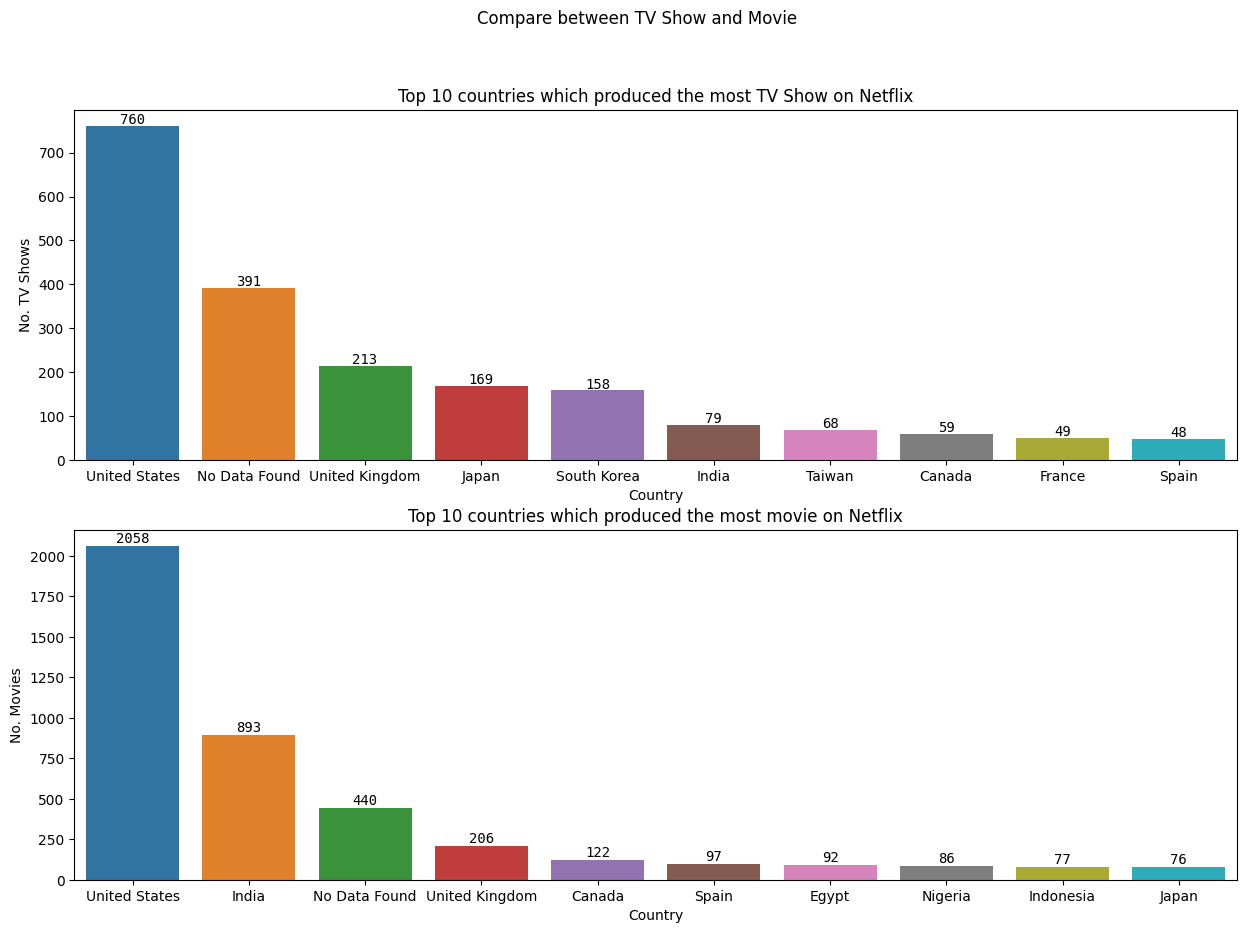

In [15]:
top10_tv_show_c = df[(df['type'] == 'TV Show')].groupby('country').size().sort_values(ascending=False)[:10].reset_index()
top10_tv_show_c.rename(columns={0:'count'}, inplace=True)

top10_movie_c = df[df['type']=='Movie'].groupby('country').size().sort_values(ascending=False)[:10].reset_index()
top10_movie_c.rename(columns={0:'movie_count'}, inplace=True)

plt.figure(figsize=(15, 10))
plt.suptitle('Compare between TV Show and Movie')

plt.subplot(211)
sns.barplot(top10_tv_show_c, x='country', y='count')
plt.xlabel('Country')
plt.ylabel('No. TV Shows')
plt.title('Top 10 countries which produced the most TV Show on Netflix')
for i in range(top10_tv_show_c.shape[0]):
    plt.text(
        x=i,
        y=top10_tv_show_c.iloc[i, 1] + 5,
        s=top10_tv_show_c.iloc[i, 1],
        ha='center',
        fontsize='medium',
        fontname='monospace'
    )

plt.subplot(212)
sns.barplot(top10_movie_c, x='country', y='movie_count')
plt.xlabel('Country')
plt.ylabel('No. Movies')
plt.title('Top 10 countries which produced the most movie on Netflix')
for i in range(top10_movie_c.shape[0]):
    plt.text(
        x=i,
        y=top10_movie_c.iloc[i, 1] + 20,
        s=top10_movie_c.iloc[i, 1],
        ha='center',
        fontsize='medium',
        fontname='monospace'
    )

plt.show()

In [16]:
# Visualize by country
data = pd.DataFrame({'Country': country_count['country'], 'Movie Count': country_count['sum']})
fig = px.choropleth(data_frame=data, locations='Country', locationmode='country names',
                color='Movie Count', title='Number of Movies Released By Country',
                color_continuous_scale='Reds', range_color=(data['Movie Count'].min(), data['Movie Count'].max()),
                labels={'Movie Count': 'Number of Movies'})
fig.show()


# Release Year & Add Year
The year 2018 is characterized by a significant presence and impact of the film industry. Despite the profound onset of the COVID-19 pandemic spanning from 2019 to 2020, it appears that the film industry has demonstrated remarkable resilience and continued to exhibit noteworthy productivity. (Above the average line)

In [17]:
# Year which Netflix add movie or TV show
df['year_added'] = df['date_added'].apply(lambda x:x.split()[2])
added_year = df.groupby('year_added').size().reset_index()
added_year.rename(columns={0: 'sum'}, inplace=True)

# Year which the movie or TV show has been released
year_release = df.groupby('release_year').size().reset_index()
year_release.rename(columns={0: 'sum'}, inplace=True)

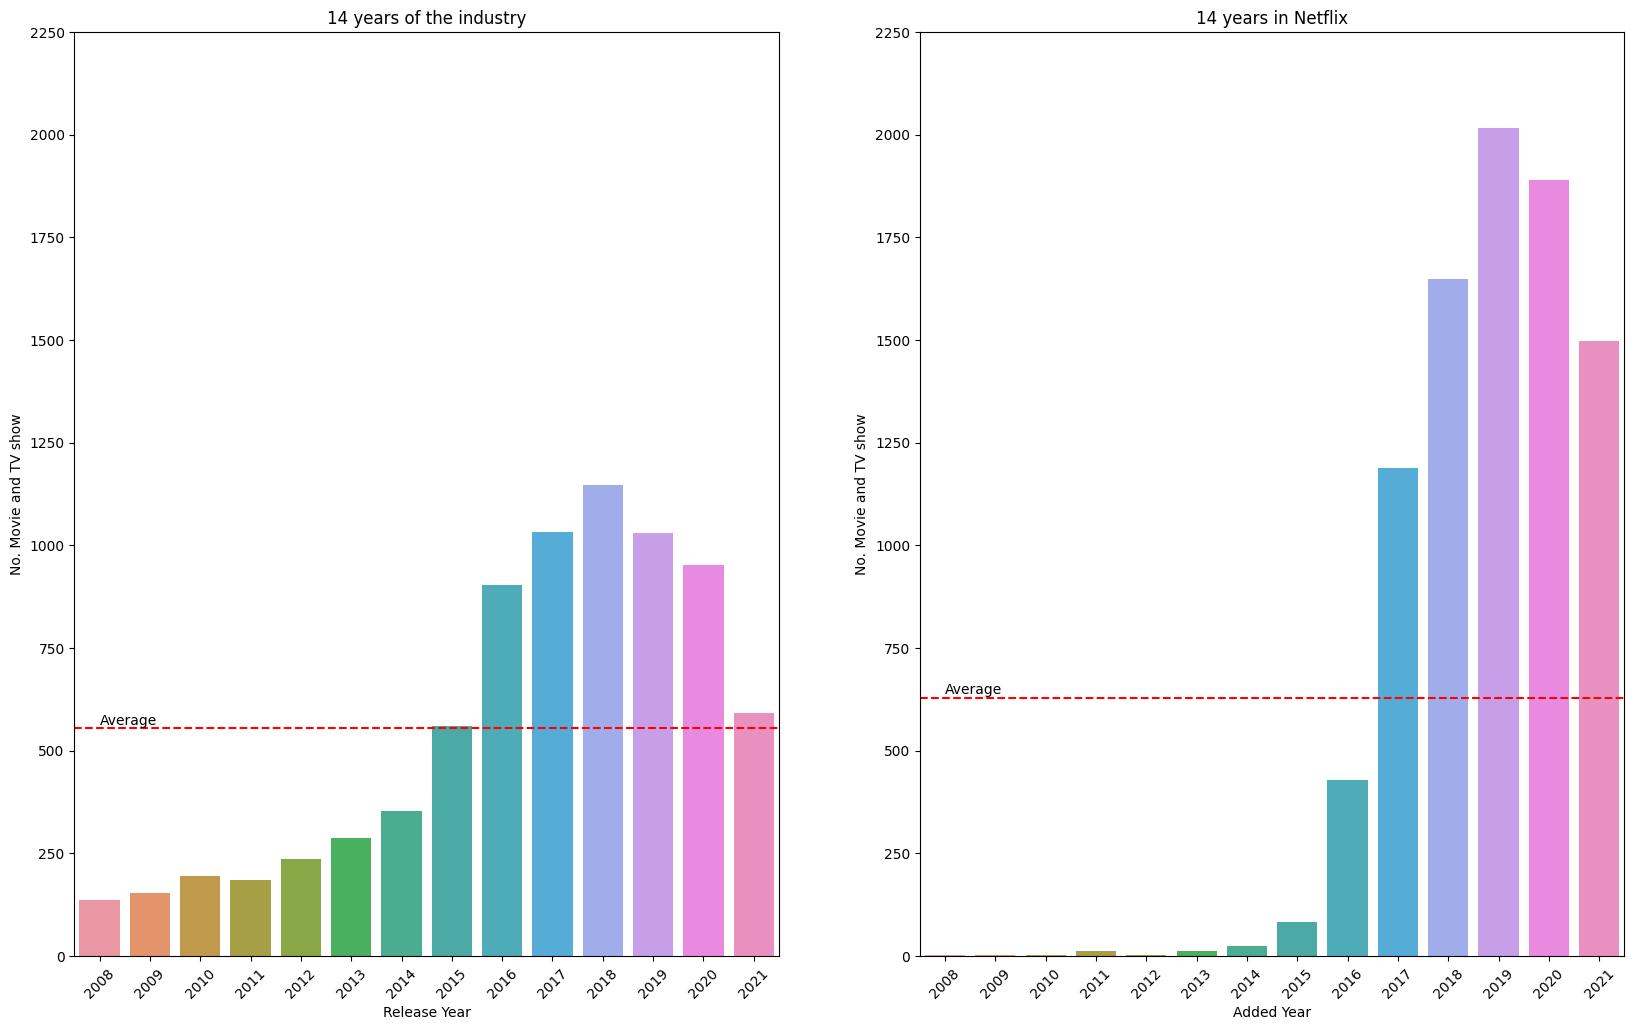

In [18]:
plt.figure(figsize=(20, 12))

plt.subplot(121)
sns.barplot(year_release[-14:], x=year_release['release_year'][-14:], y=year_release['sum'][-14:])
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.ylabel('No. Movie and TV show')
plt.yticks(range(0, 2260, 250))
plt.title('14 years of the industry')
plt.axhline(year_release['sum'][-14:].mean(), c='r', linestyle='--')
plt.text(x=0, y=year_release['sum'][-14:].mean() + 10, s='Average')

plt.subplot(122)
sns.barplot(added_year, x='year_added', y='sum')
plt.xlabel('Added Year')
plt.xticks(rotation=45)
plt.ylabel('No. Movie and TV show')
plt.yticks(range(0, 2260, 250))
plt.axhline(added_year['sum'].mean(), c='r', linestyle='--')
plt.text(s='Average', x=0, y=added_year['sum'].mean() + 10)
plt.title('14 years in Netflix')
plt.show()

Có sự đồng điệu giữa năm ra mắt phim và năm đưa bộ phim vào Netflix. Tần suất ra mắt bộ phim theo năm sẽ tỉ lệ thuận với việc đưa bộ phim đó vào Netflix trong năm tiếp theo. Điều này khá dễ hiểu khi các bộ phim mới ra mắt, phần lớn là phim ngắn muốn có lợi nhuận lớn bằng việc đưa nó vào các rạp chiếu phim, sau 1 khoảng thời gian nhất định (1-2 năm) thì họ sẽ bán bản quyền cho Netflix.

# Rating:
Looking at the group bar chart, we can see that the majority audience of both TV Show and Movie is Mature Audience Only (TV-MA)

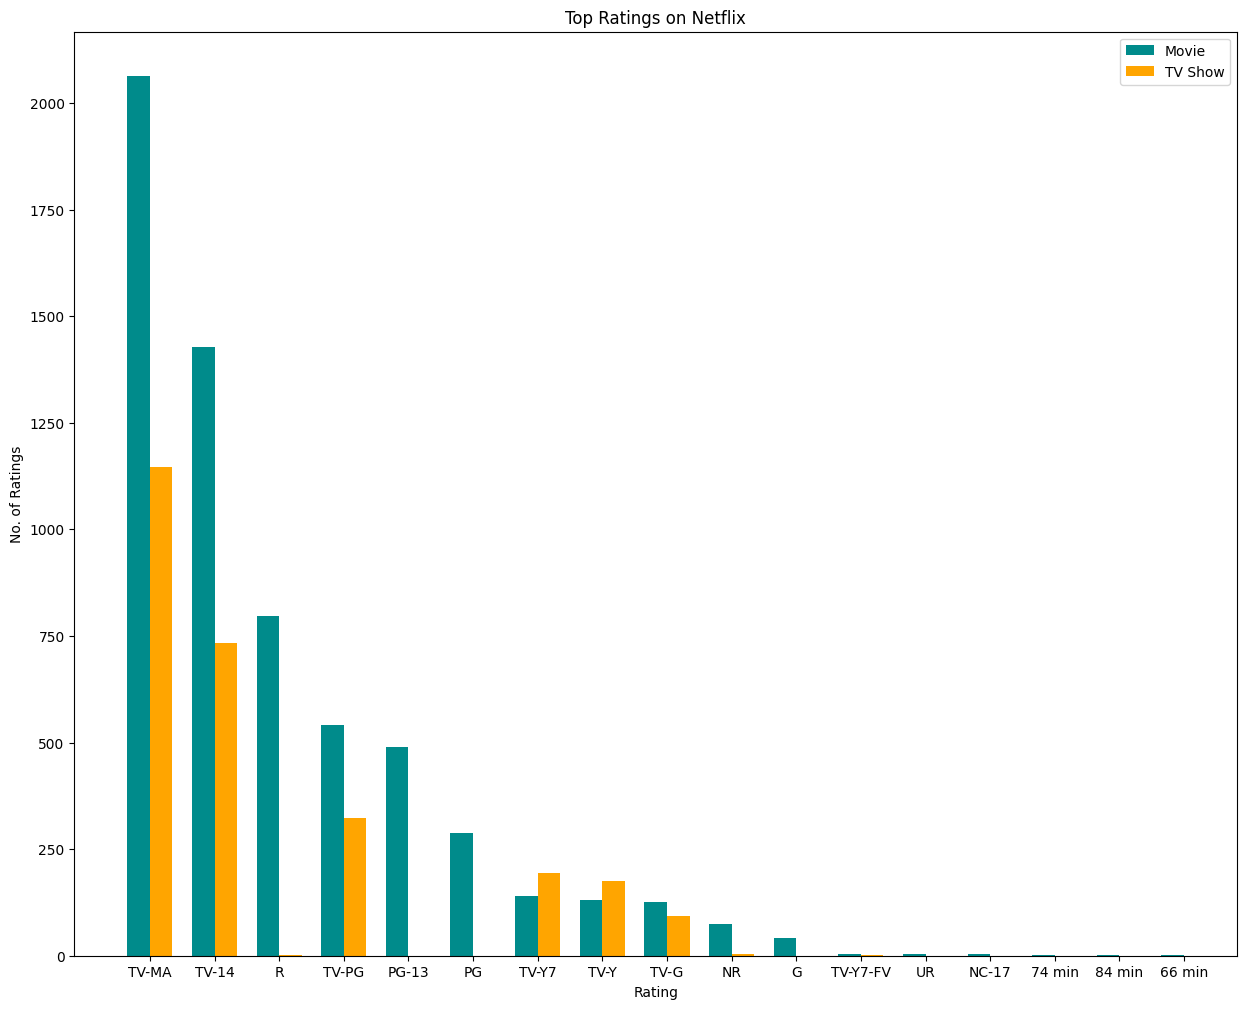

In [19]:
TV_rating = df[df['type']=='TV Show'].groupby('rating').size().sort_values(ascending=False).reset_index()
TV_rating.rename(columns={0:'sum'}, inplace=True)
TV_rating['Ratio'] = TV_rating['sum'] / df[df['type']=='TV Show'].shape[0]

movie_rating = df[df['type']=='Movie'].groupby('rating').size().sort_values(ascending=False).reset_index()
movie_rating.rename(columns={0:'sum'}, inplace=True)
movie_rating['Ratio'] = movie_rating['sum'] / df[df['type']=='Movie'].shape[0]

total_plot = pd.merge(movie_rating, TV_rating, on='rating', how='outer')
total_plot.rename(columns={'sum_x':'Movie', 'Ratio_x':'Movie ratio', 'sum_y':'TV Show', 'Ratio_y':'TV Show ratio'}, inplace=True)

plt.figure(figsize=(15, 12))
bar_width = 0.35
r1 = range(len(total_plot))
plt.bar(r1, total_plot['Movie'], color='darkcyan', width=bar_width, label='Movie')
r2 = [x + bar_width for x in r1]
plt.bar(r2, total_plot['TV Show'], color='orange', width=bar_width, label='TV Show')
plt.xlabel('Rating')
plt.xticks([r + bar_width/2 for r in r1], total_plot['rating'])
plt.ylabel('No. of Ratings')
plt.title('Top Ratings on Netflix')
plt.legend(loc='upper right')
plt.show()


TV-MA: 17+

TV-14: 14+

R: 17- need guardian or supervisor

TV-PG: unsuited for young children: parents guardian is recommended

PG-13: not be appropriate for children under 13

bộ phim ngắn và phim dài có tỉ lệ tương đối đồng đều giữa các bộ phim ngoại trừ R khi mà không có bất cứ bộ phim dài tập nào có rating R. Rating cao nhất của Netflix nằm ở TV-MA và đứng thứ 2 là TV-14, có thể nhận ra là đa số người dùng mà Netflix muốn nhắm tới là người lớn (trên 17 tuổi) và các chương trình dành teens (14+).


# Rating over years

In [20]:
rating_over_year = df[['type', 'title', 'year_added', 'rating']]
rating_over_year['Freq.'] = 1
rating_plot = rating_over_year.groupby(['year_added', 'rating']).sum()['Freq.'].reset_index()
rating_plot

<ipython-input-20-79916eb1e28f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-79916eb1e28f>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,year_added,rating,Freq.
0,2008,TV-MA,2
1,2009,TV-MA,2
2,2010,NR,1
3,2011,TV-14,5
4,2011,TV-MA,3
...,...,...,...
105,2021,TV-G,44
106,2021,TV-MA,489
107,2021,TV-PG,97
108,2021,TV-Y,57


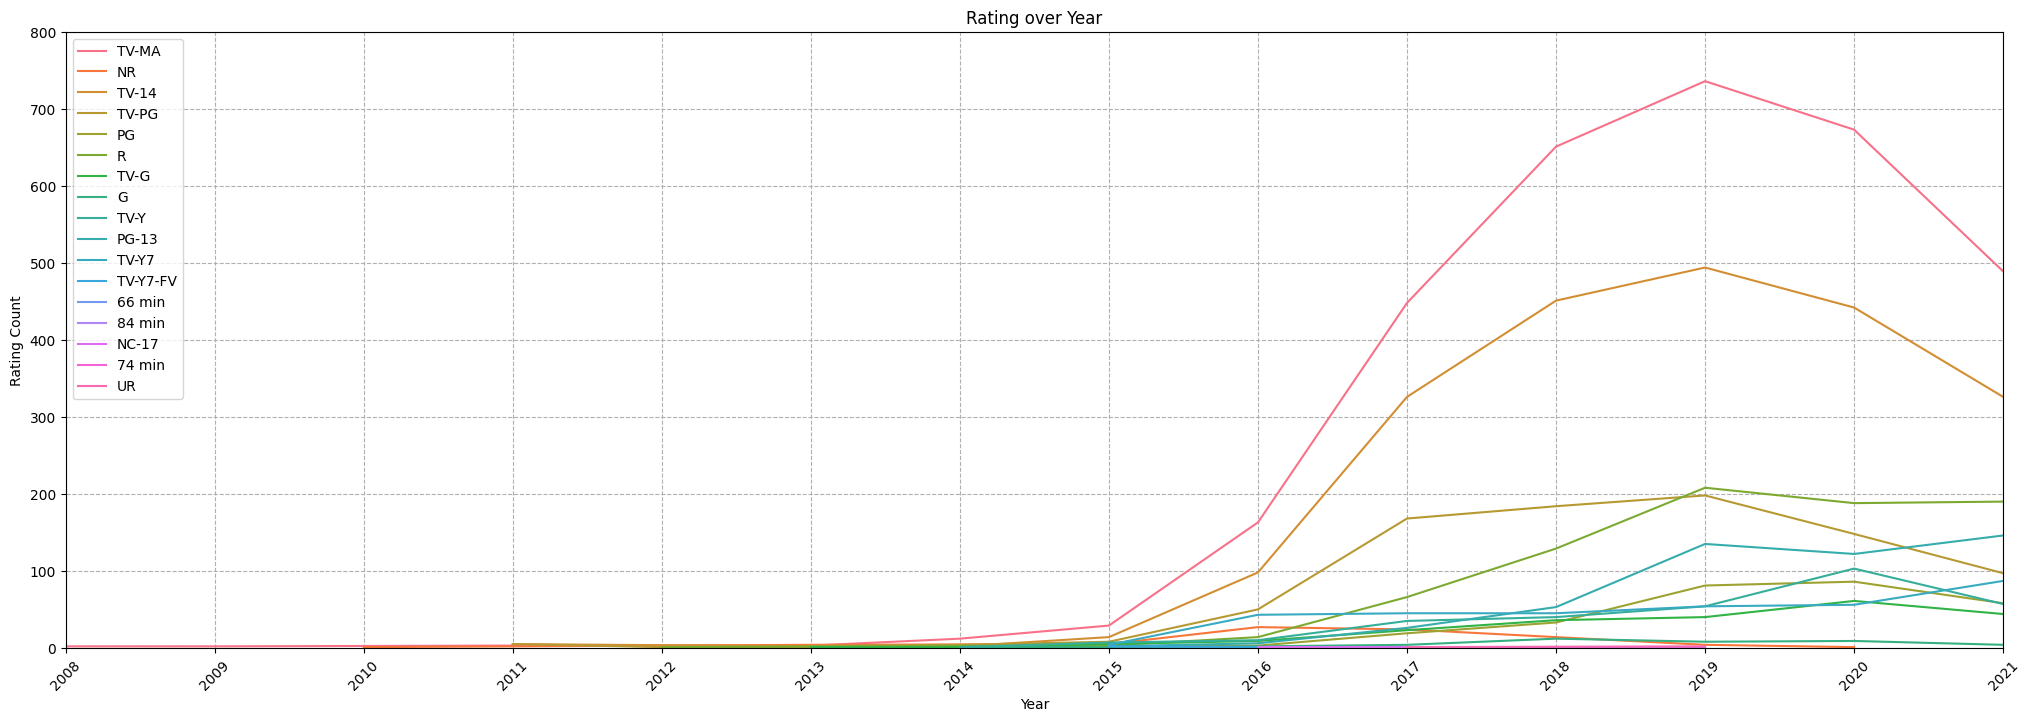

In [21]:
# Visualize
plt.figure(figsize=(25, 8))
sns.lineplot(rating_plot, x='year_added', y='Freq.', hue='rating')
plt.xlabel('Year')
plt.ylabel('Rating Count')
plt.ylim(0, 800)
plt.xlim(min(rating_plot['year_added']), max(rating_plot['year_added']))
plt.title('Rating over Year')
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.legend()
plt.show()

<ipython-input-22-c3aaa81df41c>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



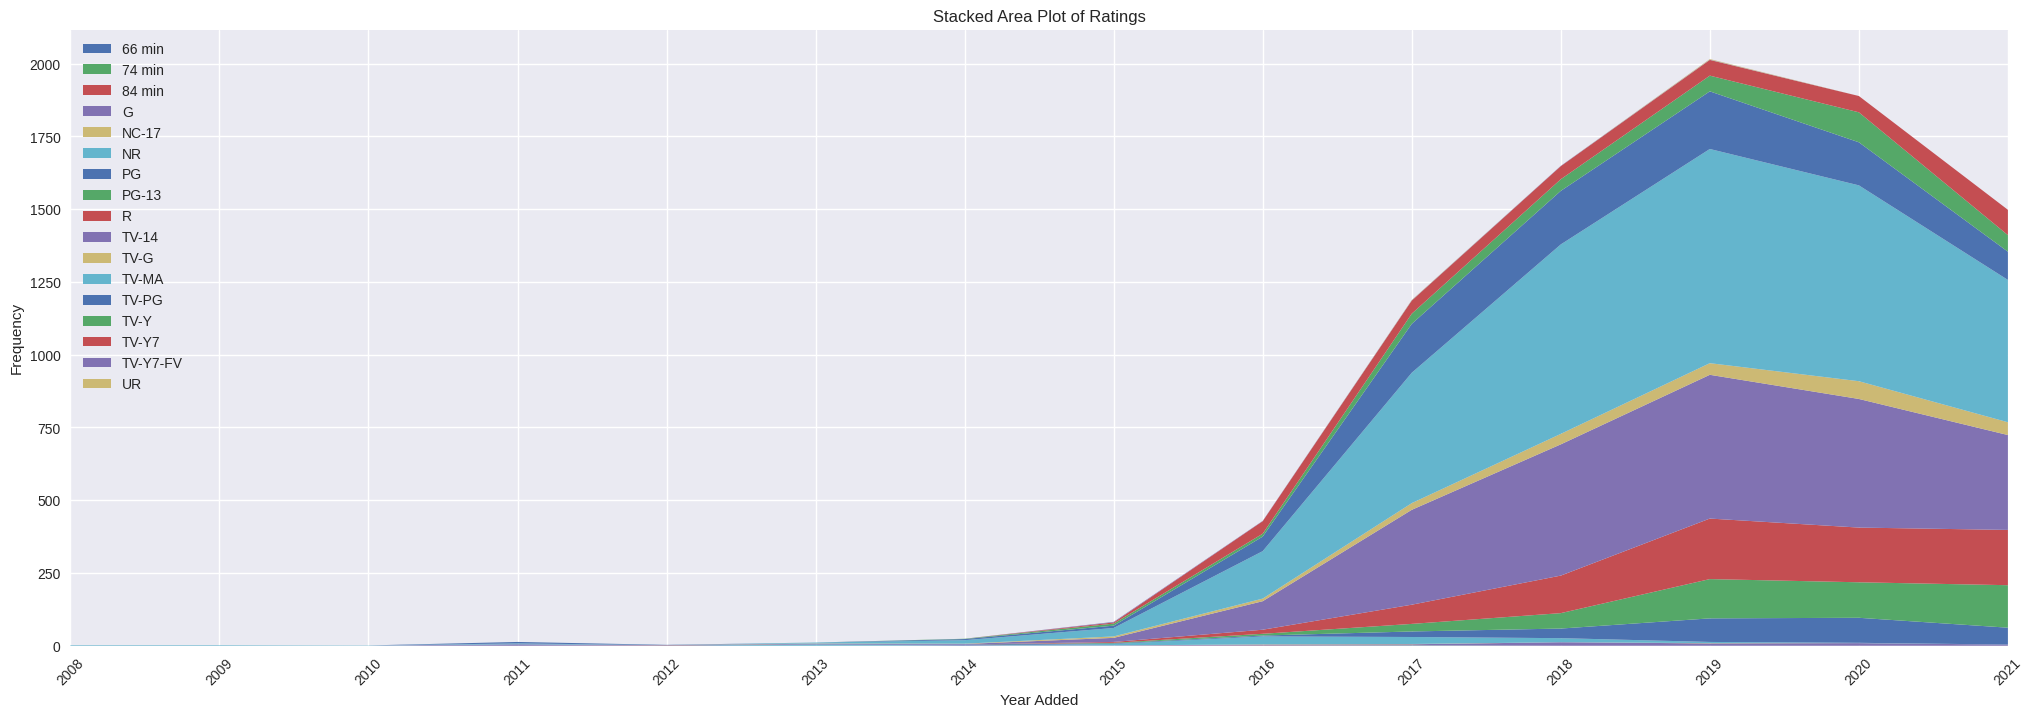

In [22]:
# Stackplot for rating over years
pivot_rating = rating_plot.pivot(index='year_added', columns='rating', values='Freq.').fillna(0)
years = pivot_rating.index.tolist()
stack_rating = pivot_rating.values.T
plt.style.use('seaborn')
plt.figure(figsize=(25, 8))
plt.stackplot(years, stack_rating, labels=pivot_rating.columns)
plt.xlabel('Year Added')
plt.ylabel('Frequency')
plt.title('Stacked Area Plot of Ratings')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.xlim(min(rating_plot['year_added']), max(rating_plot['year_added']))
plt.show()

các Rating có độ phát triển mạnh mẽ nhất qua các năm có thể nhìn thấy được bao gồm TV-MA, TV-14, TV-PG, R và PG-13, các rating này đều phát triển mạnh và đạt đỉnh vào năm 2019 và giảm dần qua các năm, tuy nhiên các rating như R và PG-13 sau đỉnh 2019 có thể nói vẫn giữ được khối lượng của mình và chỉ trượt nhẹ nếu so sánh với biên độ giảm của các Rating khác.

# Genres
Audience prefer International and Dramas type of movies and TV Show. In addition, they seem to be quite like the watch comedies.

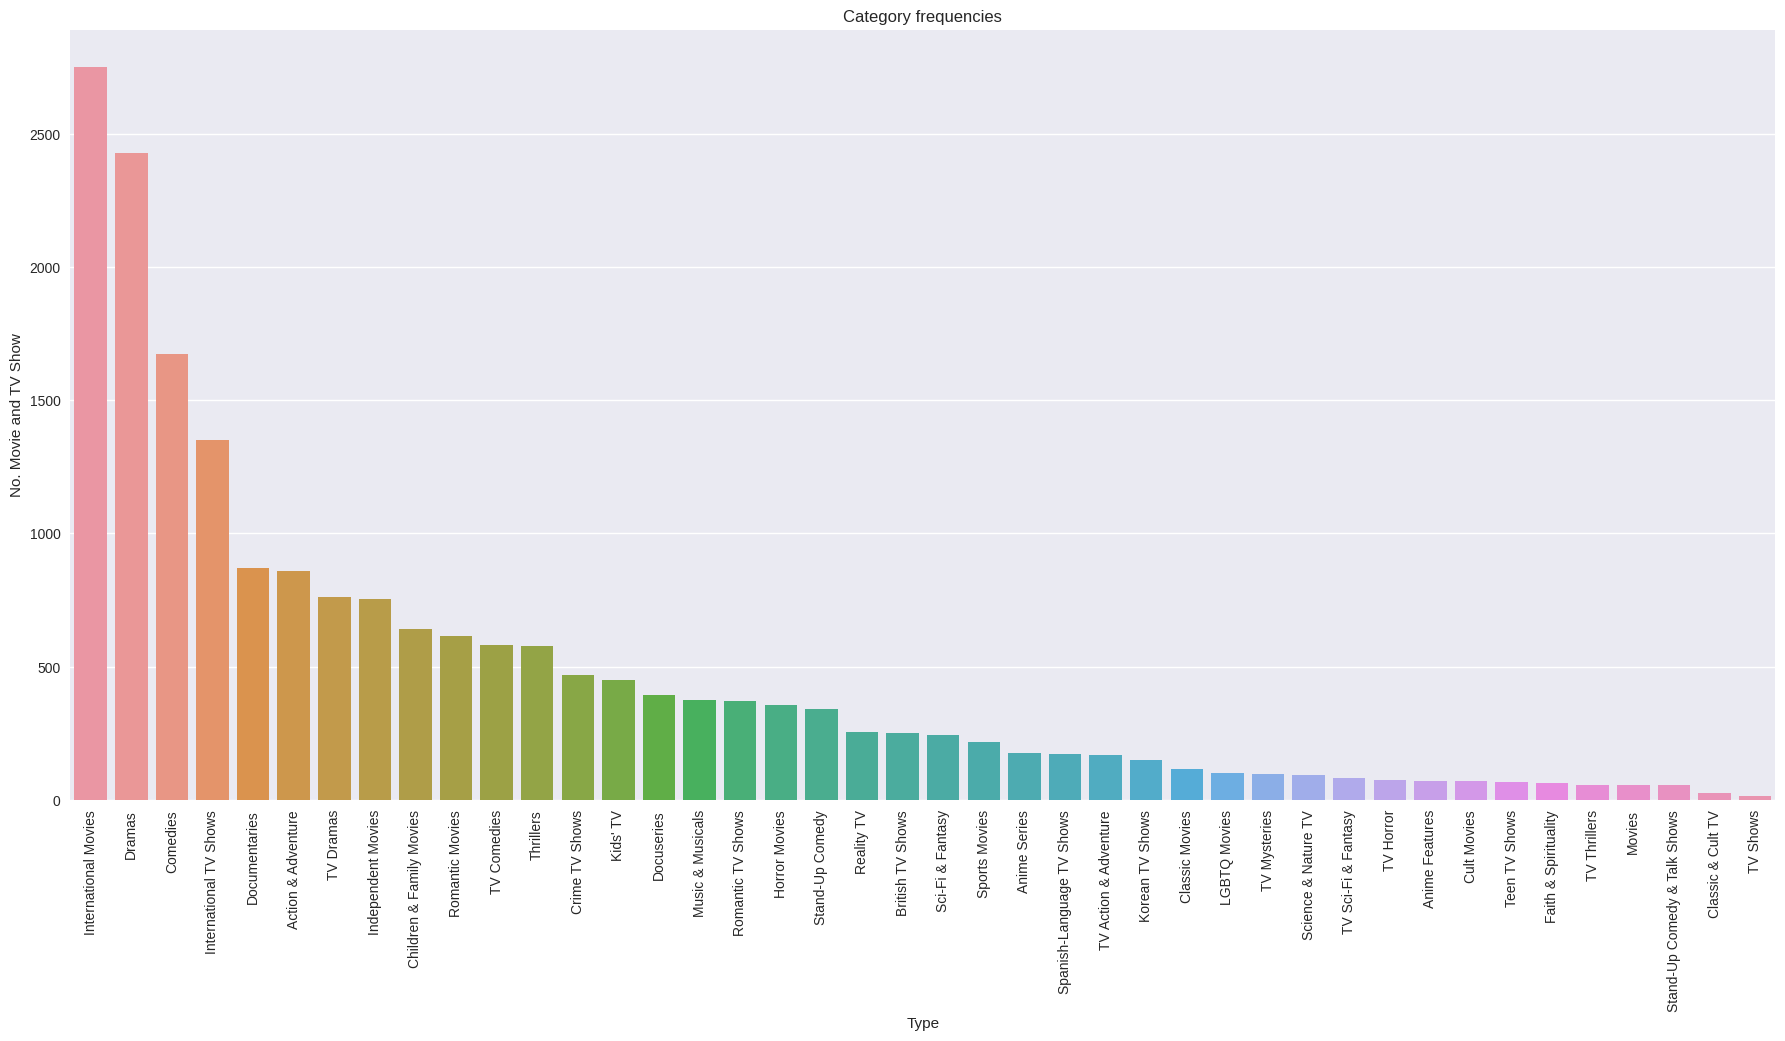

In [23]:
# Sort out all genres
genres = df['listed_in'].str.get_dummies(sep=',')
sorted_genres = genres.sum().sort_values(ascending=False).reset_index()
sorted_genres.rename(columns={'index':'Type', 0:'sum'}, inplace=True)
sorted_genres['Type'] = sorted_genres['Type'].str.strip()
sorted_genres = sorted_genres.groupby('Type')['sum'].sum().sort_values(ascending=False).reset_index()

# Visualize most loved genres
plt.figure(figsize=(22, 10))
sns.barplot(sorted_genres, x='Type', y='sum')
plt.xlabel('Type')
plt.ylabel('No. Movie and TV Show')
plt.title('Category frequencies')
plt.xticks(rotation='vertical')
plt.show()

Có 42 thể loại phim được xuất hiện dataset, tuy nhiên theo dữ liệu thì có 10 thể loại phim được thêm vào nhiều nhất, 10 thể loại phim này xét theo số lượng đều vượt qua ngưỡng trung bình trên tổng 42 thể loại phim. Đặc biệt nhất là 3 thể loại được Netflix add vào với khối lượng tương đối cao: phim quốc tế, dramas và phim hài.

# Genres over years

In [24]:
movie_over_year = df[['type', 'title', 'year_added', 'listed_in']]

In [25]:
updated_rows = []
for index, row in movie_over_year.iterrows():
    movie_type = row['type']
    movie_title = row['title']
    movie_year = row['year_added']
    movie_genres = row['listed_in'].split(',')

    for genre in movie_genres:
        updated_rows.append({
            'Movie Type' : movie_type,
            'Movie Title': movie_title,
            'Year': movie_year,
            'Genre': genre
        })
updated_df = pd.DataFrame(updated_rows)
updated_df['Freq.'] = 1
updated_df['Genre'] = updated_df['Genre'].str.strip()
updated_df['Year'] = updated_df['Year'].astype(int)
goy = updated_df.groupby(['Year','Genre']).sum()['Freq.'].reset_index()

<ipython-input-25-26e705bb92db>:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



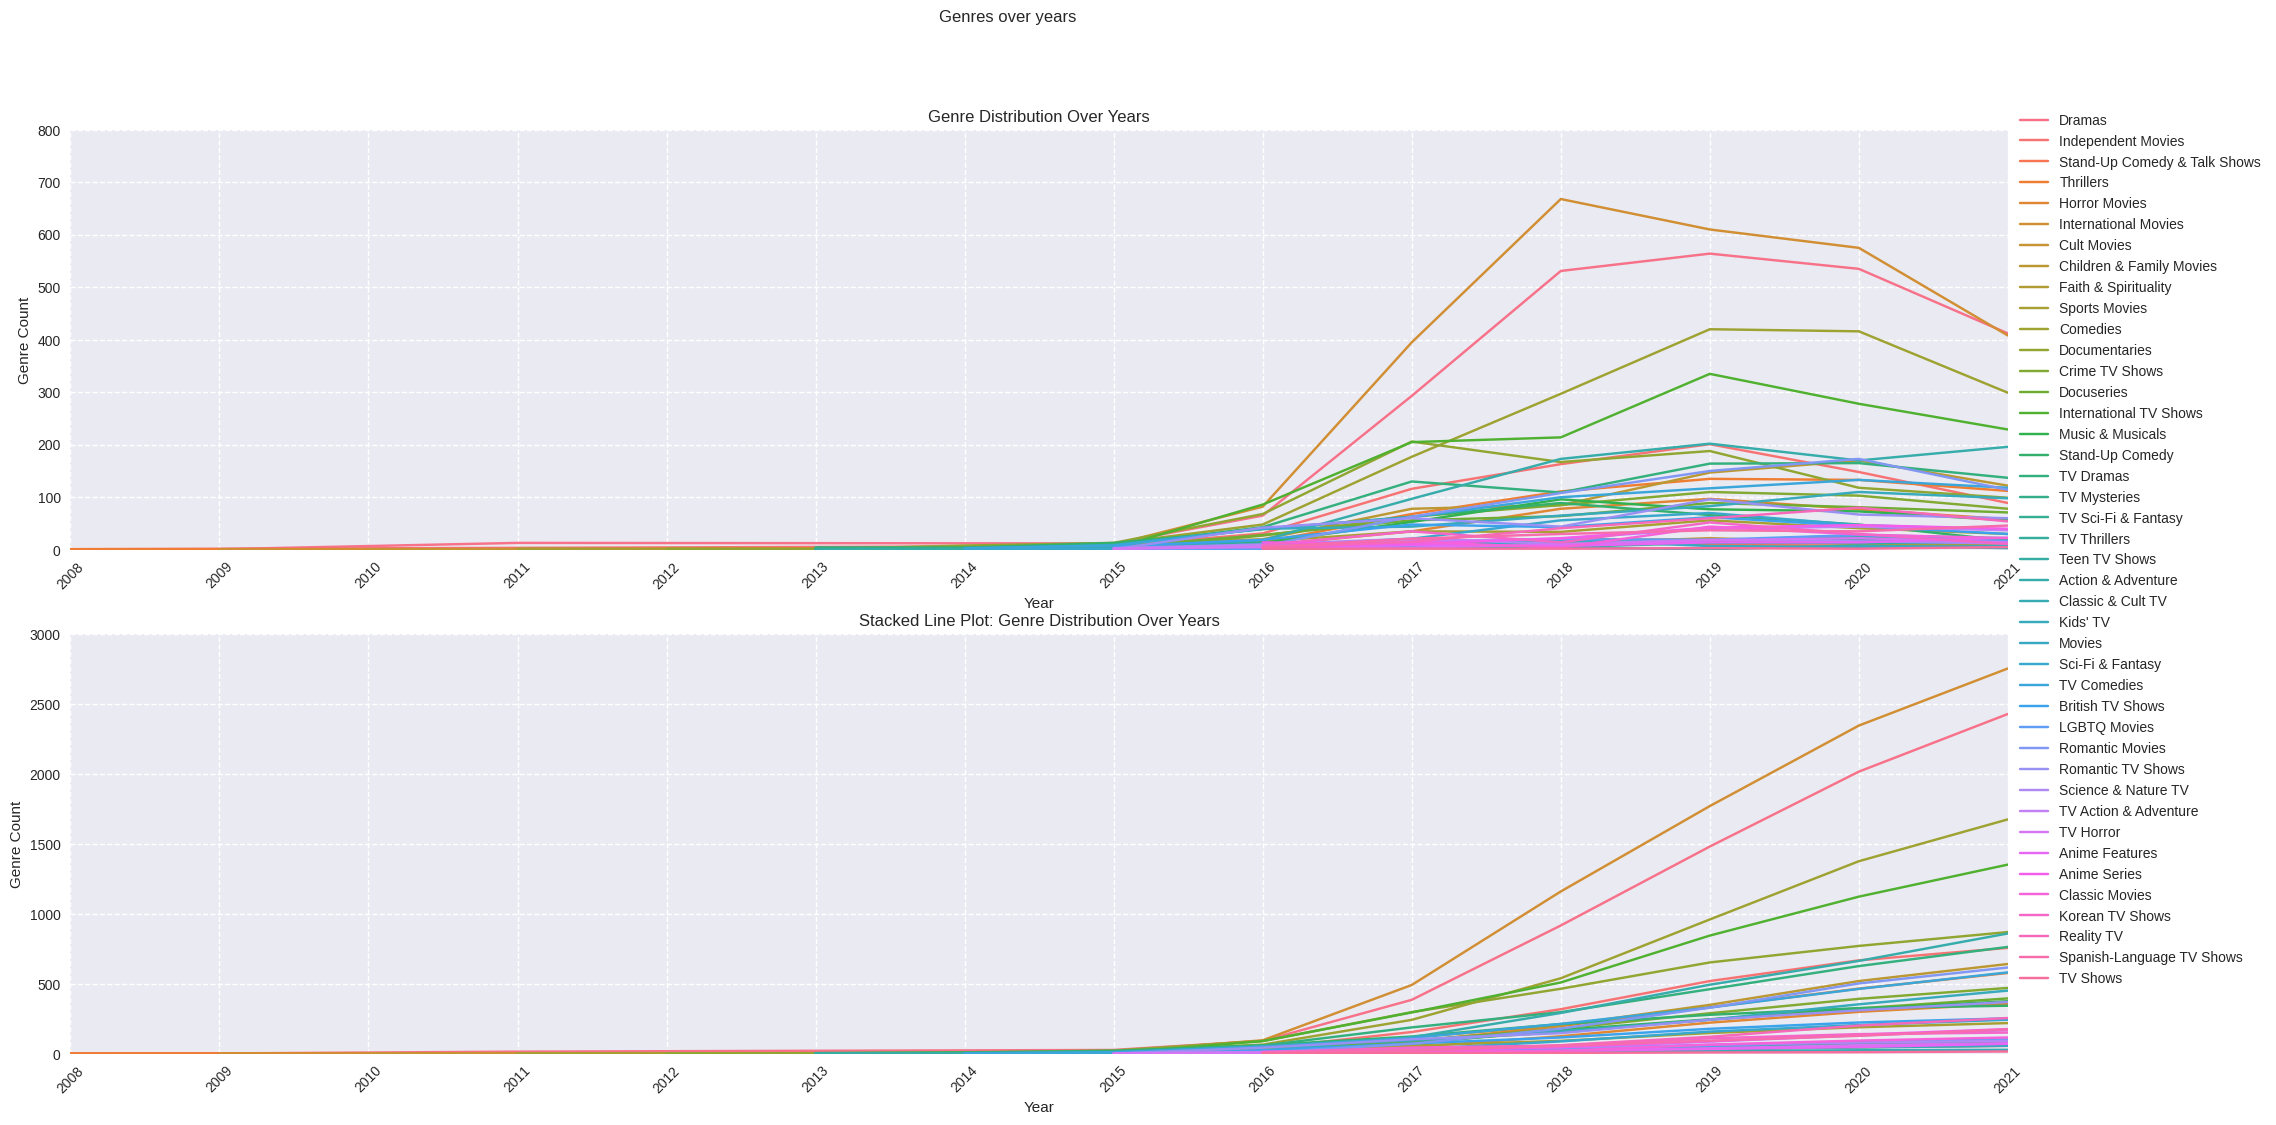

In [26]:
goy_long = goy.explode('Freq.')
goy_long['CumulativeFreq'] = goy_long.groupby('Genre')['Freq.'].cumsum()

plt.figure(figsize=(25, 12))
plt.suptitle('Genres over years')

plt.subplot(211)
plt.title('Genre Distribution Over Years')
sns.lineplot(goy_long, x='Year', y='Freq.', hue='Genre')
plt.xlabel('Year')
plt.ylabel('Genre Count')
plt.xlim(min(goy_long['Year']), max(goy_long['Year']))
plt.xticks(range(2008, 2022), rotation=45)
plt.ylim(0, 800)
plt.grid(linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0))

plt.subplot(212)
sns.lineplot(data=goy_long, x='Year', y='CumulativeFreq', hue='Genre', legend=False)
plt.xlabel('Year')
plt.ylabel('Genre Count')
plt.title('Stacked Line Plot: Genre Distribution Over Years')
plt.ylim(0, 3000)
plt.xlim(min(goy_long['Year']), max(goy_long['Year']))
plt.grid(linestyle='--')
plt.xticks(range(2008, 2022), rotation=45)

plt.show()

<ipython-input-27-a26b84176d80>:11: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-27-a26b84176d80>:22: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



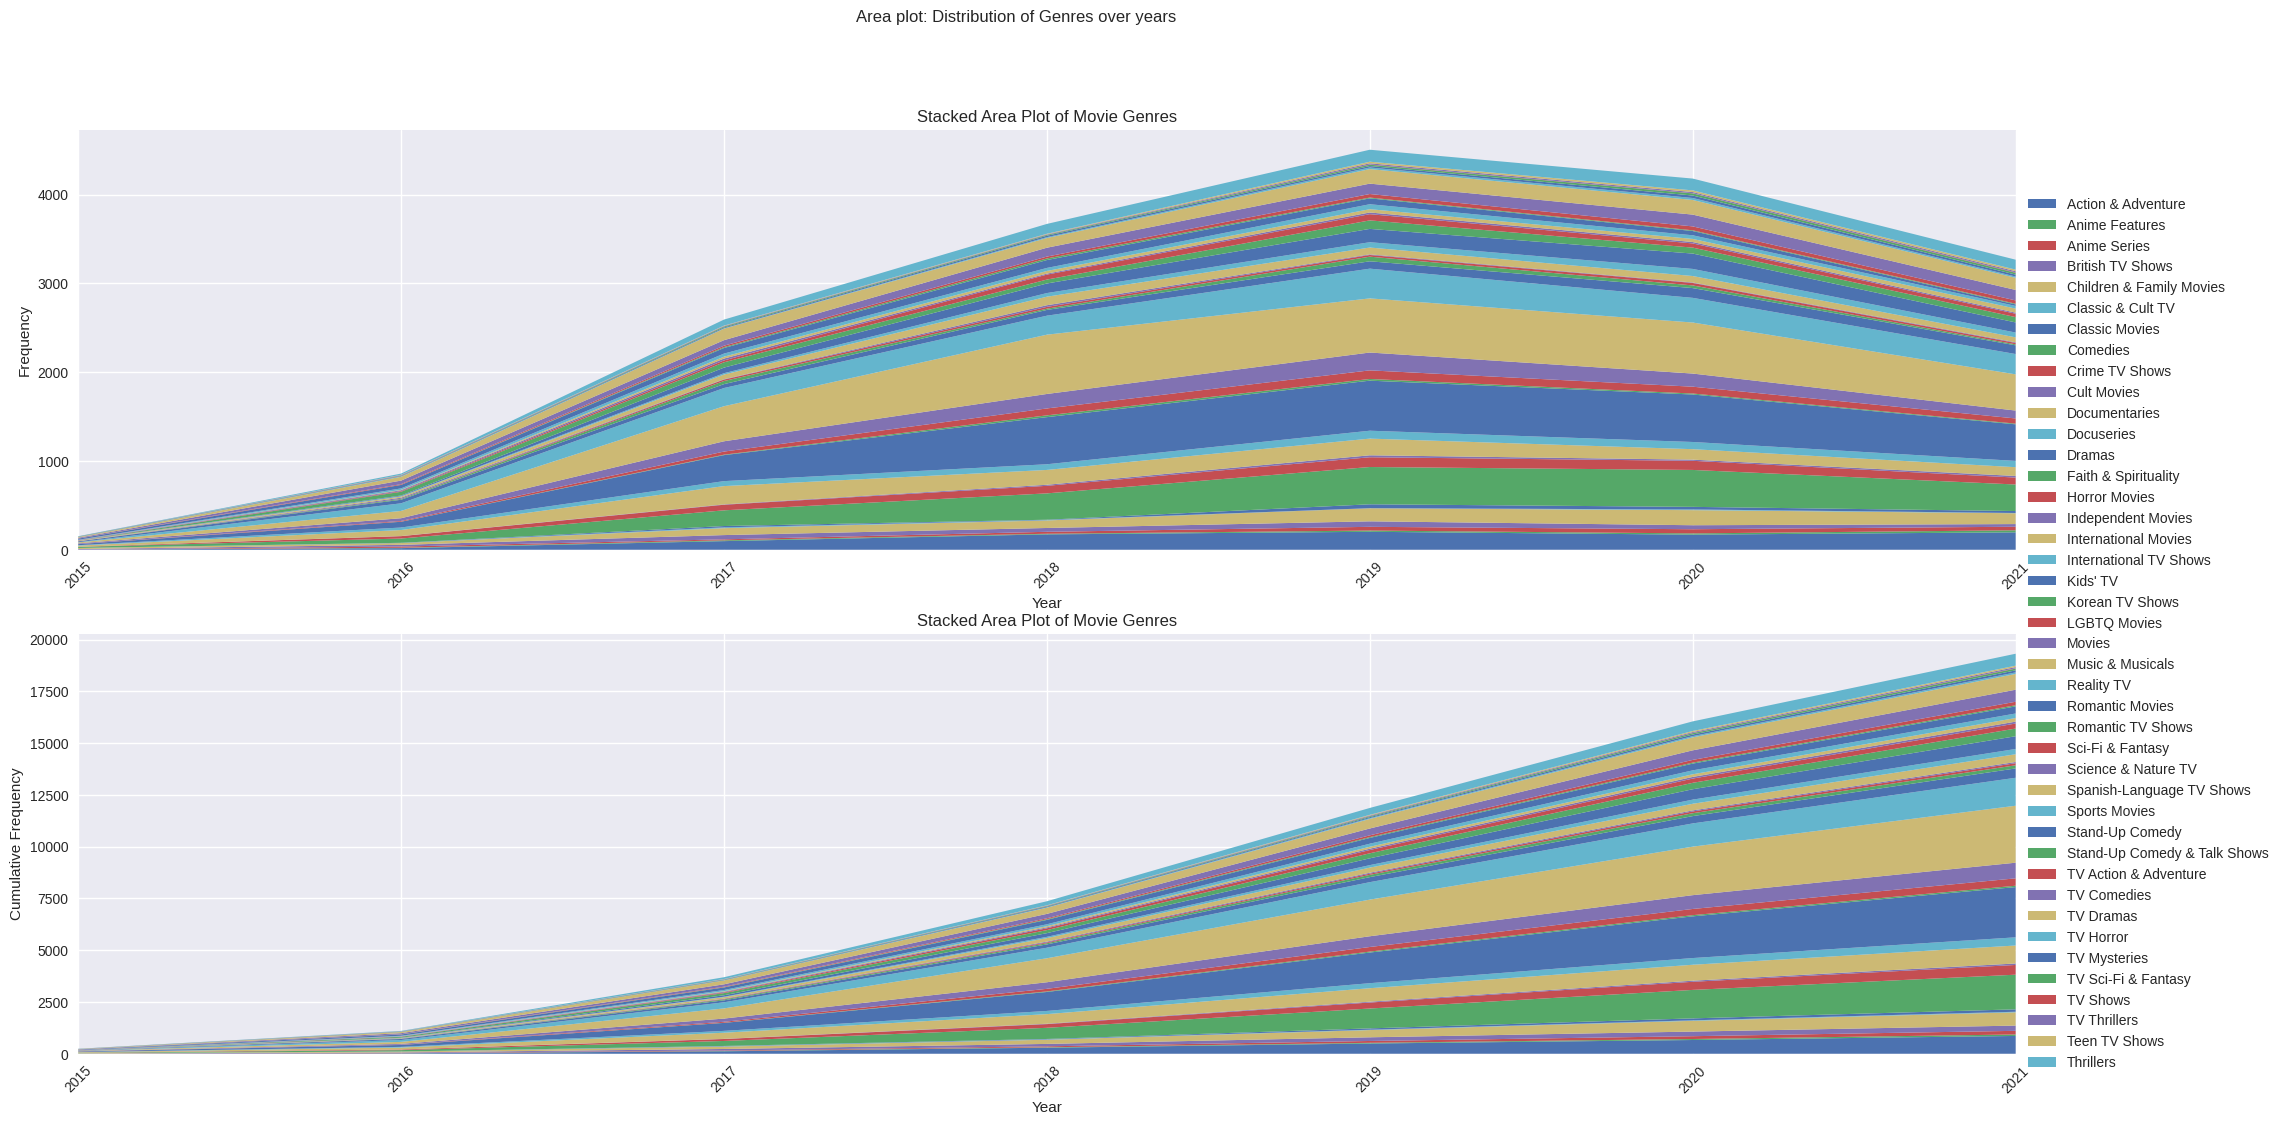

In [27]:
filtered_data = goy_long[goy_long['Year'] >= 2015]

plt.figure(figsize=(25, 12))
plt.suptitle('Area plot: Distribution of Genres over years')

plt.subplot(211)
pivot_data = filtered_data.pivot(index='Year', columns='Genre', values='Freq.').fillna(0)
years = pivot_data.index.tolist()
stack_data = pivot_data.values.T
plt.stackplot(years, stack_data, labels=pivot_data.columns)
plt.style.use('seaborn')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Stacked Area Plot of Movie Genres')
plt.xlim(min(filtered_data['Year']), max(filtered_data['Year']))
plt.xticks(range(2015, 2022), rotation=45)

plt.subplot(212)
pivot_cum = filtered_data.pivot(index='Year', columns='Genre', values='CumulativeFreq').fillna(0)
years = pivot_cum.index.tolist()
stack_data = pivot_cum.values.T
plt.style.use('seaborn')
plt.stackplot(years, stack_data, labels=pivot_cum.columns)
plt.xlabel('Year')
plt.ylabel('Cumulative Frequency')
plt.title('Stacked Area Plot of Movie Genres')
plt.xlim(min(filtered_data['Year']), max(filtered_data['Year']))
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.xticks(range(2015, 2022), rotation=45)

plt.show()

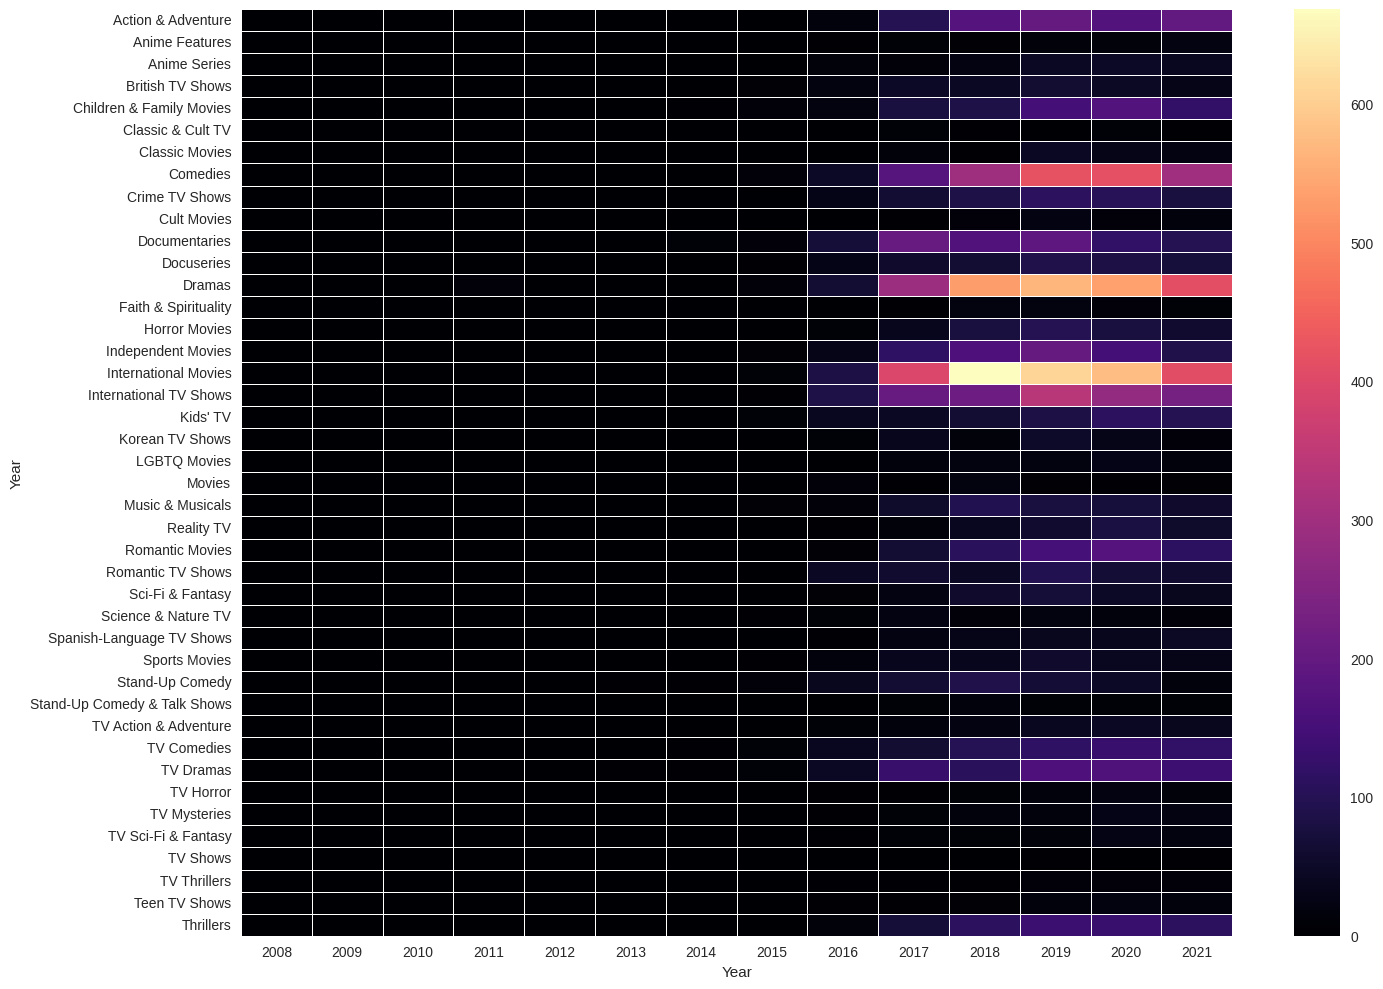

In [28]:
# Heatmap
heatmap_data = goy_long.pivot_table(index='Genre', columns='Year', values='Freq.', fill_value=0)
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='magma', linewidths=0.5, annot=False, fmt='g')
plt.xlabel('Year')
plt.ylabel('Year')
plt.tight_layout()

plt.show()

Nếu ta so sánh qua các năm, trở về độ phát triển của Netflix nếu nhìn theo bar chart ở trên thì có thể thấy được quá trình này được bắt đầu vào thời điểm năm 2016. Khi nhìn qua 2 năm 2016 và 2017, ta có thể thấy được khối lượng của các thể loại phim này vào năm 2017 tăng gấp 3, thậm chí là 3.5 lần so với năm trước đó, có thể nhận ra rằng khoảng thời gian này chính là khoảng thời gian người dùng Netflix trên toàn thế giới bắt đầu tăng đột biến và việc tăng không đồng đều trên toàn bộ các thể loại phim này có thể nhìn ra được là Netflix đang thăm dò xu hướng của người dùng trên Netflix khi mà họ tập trung khá nhiều vào thể loại phim quốc tế, Dramas, Comedies, Phim quốc tế dài tập và phim tài liệu. Điều này càng dễ nhận ra khi tiếp tục nhìn vào các năm tiếp theo đó, khi mà khối lượng phim của những bộ phim được đề cập ở trên tăng mạnh, tuy nhiên nó bị chững lại với phim tài liệu. Có thể nói ra họ đã nhận ra được xu hướng qua 2 năm thăm dò và điều chỉnh lại khối lượng của những bộ phim được thêm vào.

Đi sâu vào 3 bộ phim có khối lượng cao nhỉnh hơn so với các bộ phim còn lại thì có thể nhận ra là nhận định vừa rồi khá đúng. Đặc biệt khối lượng những thể loại phim này đạt đỉnh vào năm 2019 và giảm dần 2 năm tiếp theo, nguyên nhân có thể kể đến như đại dịch Covid19 nên việc kinh doanh bị chững lại và việc hạn chế tiếp xúc cũng khiến cho các nhà làm phim phải tạm hoãn một thời gian mới có thể tiếp tục công việc làm trễ tiến độ ra mắt của bộ phim.


# Month-Wise
The distribution maintains the most in Summer and at the end of the year which is December. However, the number of movies is also evenly distributed over the months.

In [29]:
df['month_added'] = df['date_added'].apply(lambda x: x.split()[0])
month = df.groupby('month_added').size().reset_index()
month.rename(columns={0: 'frequency'}, inplace=True)

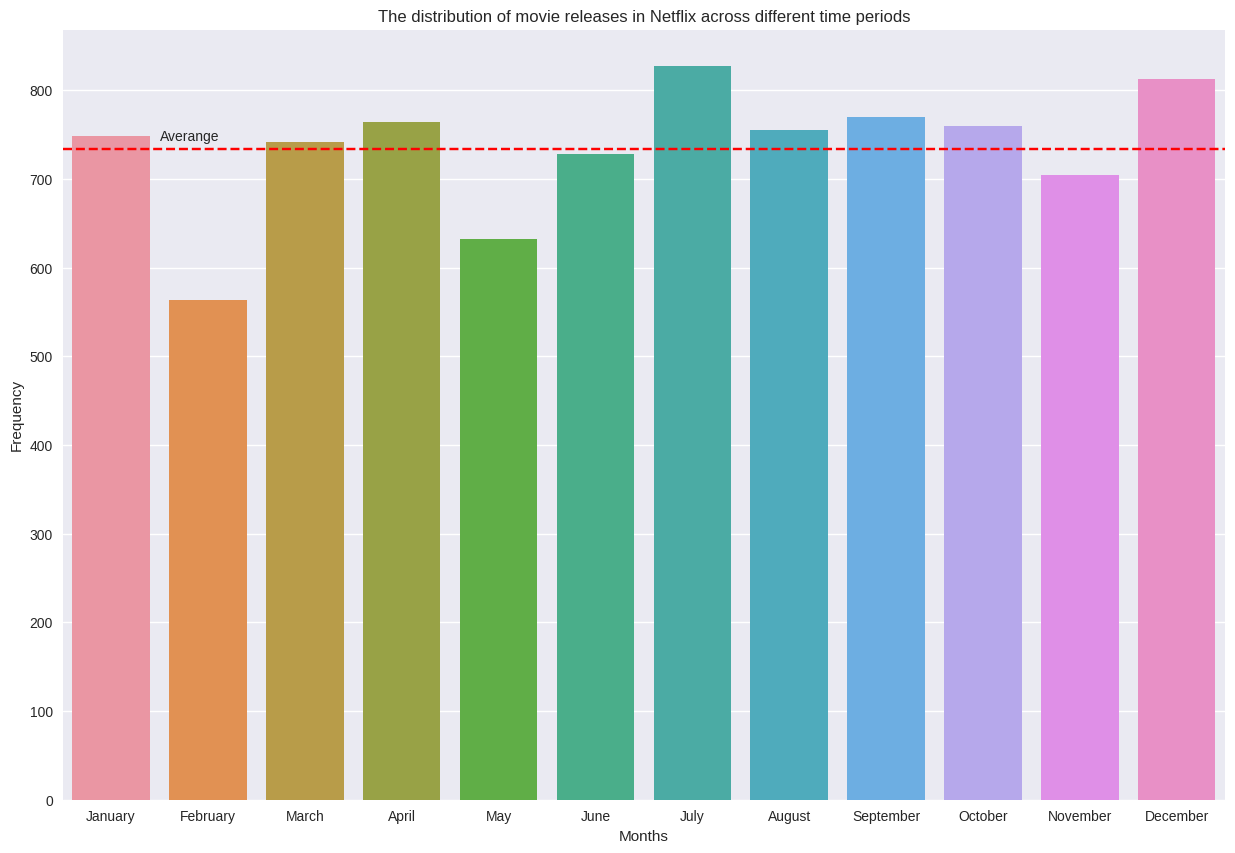

In [30]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
plt.figure(figsize=(15, 10))
sns.barplot(month, x='month_added', y='frequency', order=month_order)
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('The distribution of movie releases in Netflix across different time periods')
plt.axhline(month['frequency'].mean(), c='r', linestyle='--')
plt.text(s='Averange', x=0.5, y=month['frequency'].mean() + 10)
plt.show()

Những bộ phim được add mạnh mẽ khá đồng đều vào các thời điểm trong năm, tuy nhiên đặc biệt hơn là vào mùa hè và mùa đông, thời điểm mà những lễ hội và các ngày nghỉ thường xuyên xuất hiện, đây là một trong những chiến lược marketing khi tập trung vào những thời gian này để người dùng có thể coi được những bộ phim mới khi có thời gian rảnh ở nhà.

# Recommendation System

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_movies(movie_title, data):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(data['listed_in'])
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
    movie_index = data[data['title'] == movie_title].index[0]
    cosine_similarities_movie = cosine_similarities[movie_index]
    similar_movie_indices = cosine_similarities_movie.argsort()[:-11:-1]
    similar_movies = data.iloc[similar_movie_indices].reset_index(drop=True)
    return similar_movies

Testing

In [32]:
movie_over_year.sample(5, random_state=1234)

,type,title,year_added,listed_in
4048,Movie,River's Edge,2019,"Dramas, International Movies"
1586,TV Show,Room 2806: The Accusation,2020,"Crime TV Shows, Docuseries, International TV S..."
3838,TV Show,The Mechanism,2019,"Crime TV Shows, International TV Shows, TV Dramas"
5292,Movie,Berserk: The Golden Age Arc II - The Battle fo...,2017,"Action & Adventure, Anime Features, Internatio..."
6535,Movie,Cop Watchers,2017,"Documentaries, International Movies"


In [33]:
movie_title = '''River's Edge'''
recommend_similar_movies(movie_title, movie_over_year)

,type,title,year_added,listed_in
0,Movie,Samarppanam,2018,"Dramas, International Movies"
1,Movie,The Bling Lagosians,2019,"Dramas, International Movies"
2,Movie,On My Skin,2018,"Dramas, International Movies"
3,Movie,The Photographer Of Mauthausen,2019,"Dramas, International Movies"
4,Movie,The Resistance Banker,2018,"Dramas, International Movies"
5,Movie,Baazaar,2019,"Dramas, International Movies"
6,Movie,O Silêncio do Céu,2017,"Dramas, International Movies"
7,Movie,Street Flow,2019,"Dramas, International Movies"
8,Movie,Mala Kahich Problem Nahi,2018,"Dramas, International Movies"
9,Movie,Retablo,2020,"Dramas, International Movies"
